In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelBinarizer
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_excel("CTG.xls",2)
data.head()

,FileName,Date,SegFile,b,e,LBE,LB,AC,FM,UC,...,C,D,E,AD,DE,LD,FS,SUSP,CLASS,NSP
0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Variab10.txt,1996-12-01,CTG0001.txt,240.0,357.0,120.0,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9.0,2.0
2,Fmcs_1.txt,1996-05-03,CTG0002.txt,5.0,632.0,132.0,132.0,4.0,0.0,4.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
3,Fmcs_1.txt,1996-05-03,CTG0003.txt,177.0,779.0,133.0,133.0,2.0,0.0,5.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0
4,Fmcs_1.txt,1996-05-03,CTG0004.txt,411.0,1192.0,134.0,134.0,2.0,0.0,6.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,6.0,1.0


In [3]:
#Remove unwanted columns
dataset_rmvCol = data.drop(columns=['FileName', 'SegFile', 'Date'])

In [4]:
#remove null values from dataset
finaldata = dataset_rmvCol.dropna()

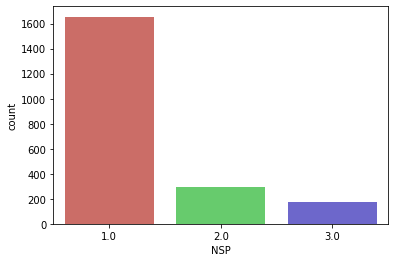

In [5]:
sns.countplot(x = 'NSP', data = finaldata, palette = 'hls')
plt.show()

In [6]:
x = finaldata[['b', 'e', 'LBE', 'LB', 'AC', 'FM', 'UC', 'ASTV', 'MSTV', 'ALTV', 'MLTV','DL', 'DS', 'DP', 'DR', 'Width', 'Min', 'Max', 'Nmax','Nzeros', 'Mode', 'Mean', 'Median', 'Variance', 'Tendency', 'A', 'B', 'C', 'D', 'E', 'AD', 'DE', 'LD', 'FS', 'SUSP', 'CLASS']]
y = finaldata['NSP']

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

In [8]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_pred = model.predict(x_test)

In [10]:
#A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.
confusion_Matrix = metrics.confusion_matrix(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred))
#Diagonal ele represent accurate predictions, non-diagonnal ele are inaccurate predictions

[[399  12   6]
 [ 41  31   0]
 [  5   9  29]]


Text(0.5, 257.44, 'Predicted label')

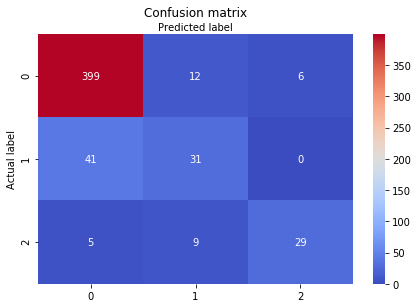

In [11]:
#confusion matrix using heatmap
class_names=[1,2,3]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confusion_Matrix), annot=True, cmap="coolwarm" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8627819548872181


In [13]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    y_pred = lb.transform(y_pred)
    return roc_auc_score(y_test, y_pred, average=average)
auc = multiclass_roc_auc_score(y_test, y_pred, average="macro")
print("Area under curve : ", auc)

Area under curve :  0.7673144300029114
